In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [14]:
# Load dataset
df = pd.read_csv('heart 2 m.csv')


In [16]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [20]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [22]:
#  Correlation with target
print("\n Feature correlation with target:\n")
print(df.corr()["target"].abs().sort_values(ascending=False))


 Feature correlation with target:

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [24]:
# EDA: Analyzing the Target Variable
print("\n EDA: Target Variable Distribution")
y = df["target"]


 EDA: Target Variable Distribution


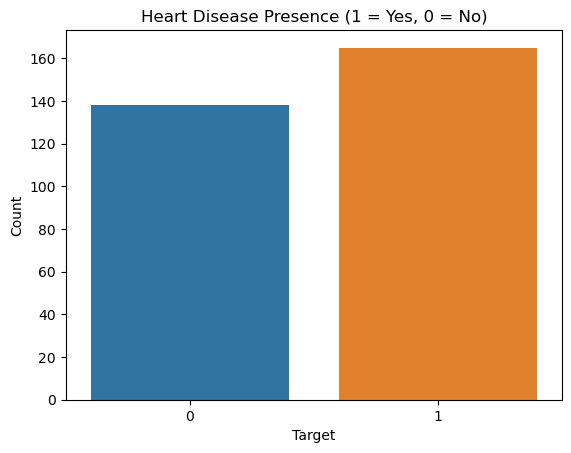

In [26]:
# Countplot
sns.countplot(x=y)
plt.title("Heart Disease Presence (1 = Yes, 0 = No)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

In [28]:
# Target distribution
target_temp = y.value_counts().sort_index()
print("\nTarget Value Counts:")
print(target_temp)


Target Value Counts:
target
0    138
1    165
Name: count, dtype: int64


In [30]:
# Class distribution
print("Percentage of patients without heart disease: " + str(round(target_temp[0]*100/len(df), 2)) + "%")
print("Percentage of patients with heart disease: " + str(round(target_temp[1]*100/len(df), 2)) + "%")


Percentage of patients without heart disease: 45.54%
Percentage of patients with heart disease: 54.46%


In [42]:
#EDA: Categorical Features Analysis


Analyzing the 'sex' Feature
Unique values in 'sex': [1 0]


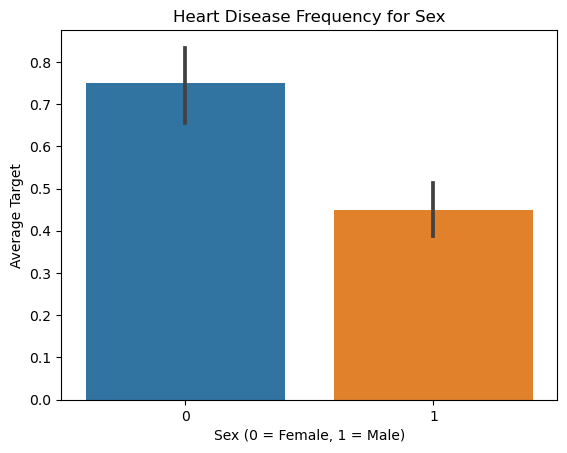

In [32]:
# Analyzing the 'sex' Feature
print("\nAnalyzing the 'sex' Feature")
print("Unique values in 'sex':", df["sex"].unique())
sns.barplot(x=df["sex"], y=df["target"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Average Target")
plt.show()


Analyzing the 'cp' Feature (Chest Pain Type)
Unique values in 'cp': [3 2 1 0]


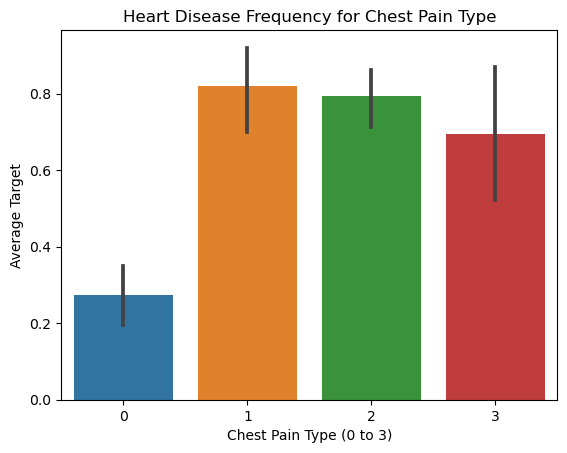

In [44]:
#Analyzing the 'cp' (Chest Pain Type) Feature
print("\nAnalyzing the 'cp' Feature (Chest Pain Type)")
print("Unique values in 'cp':", df["cp"].unique())
sns.barplot(x=df["cp"], y=df["target"])
plt.title("Heart Disease Frequency for Chest Pain Type")
plt.xlabel("Chest Pain Type (0 to 3)")
plt.ylabel("Average Target")
plt.show()


Analyzing the 'restecg' Feature
Unique values in 'restecg': [0 1 2]


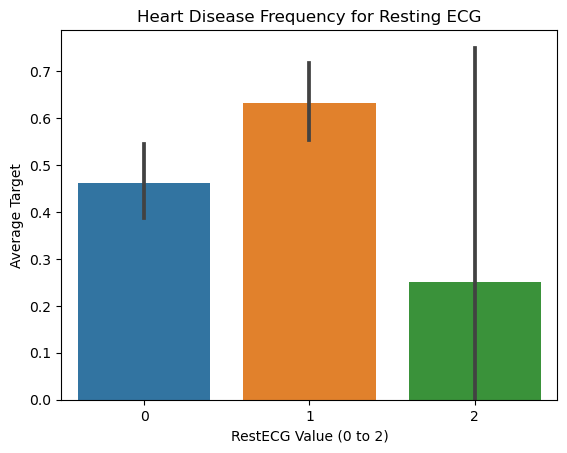

In [46]:
#Analyzing the 'restecg' Feature
print("\nAnalyzing the 'restecg' Feature")
print("Unique values in 'restecg':", df["restecg"].unique())
sns.barplot(x=df["restecg"], y=df["target"])
plt.title("Heart Disease Frequency for Resting ECG")
plt.xlabel("RestECG Value (0 to 2)")
plt.ylabel("Average Target")
plt.show()


Analyzing the 'exang' Feature
Unique values in 'exang': [0 1]


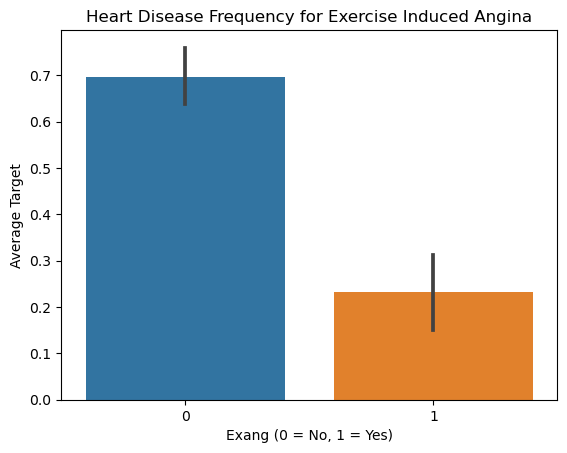

In [48]:
#Analyzing the 'exang' Feature (Exercise Induced Angina)
print("\nAnalyzing the 'exang' Feature")
print("Unique values in 'exang':", df["exang"].unique())
sns.barplot(x=df["exang"], y=df["target"])
plt.title("Heart Disease Frequency for Exercise Induced Angina")
plt.xlabel("Exang (0 = No, 1 = Yes)")
plt.ylabel("Average Target")
plt.show()


Analyzing the 'slope' Feature
Unique values in 'slope': [0 2 1]


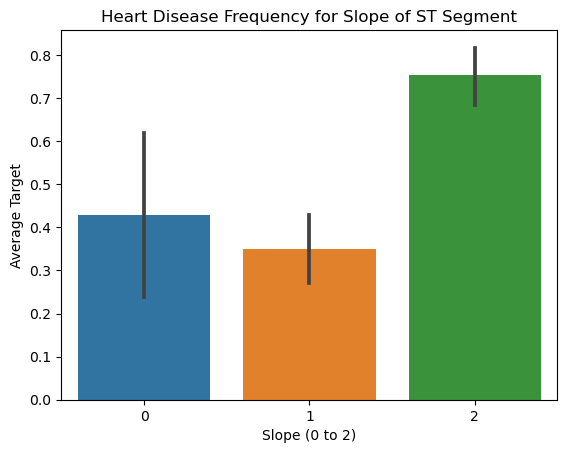

In [50]:
# Analyzing the 'slope' Feature
print("\nAnalyzing the 'slope' Feature")
print("Unique values in 'slope':", df["slope"].unique())
sns.barplot(x=df["slope"], y=df["target"])
plt.title("Heart Disease Frequency for Slope of ST Segment")
plt.xlabel("Slope (0 to 2)")
plt.ylabel("Average Target")
plt.show()

In [52]:
#missing value checking
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [54]:
X = df.drop('target', axis=1)

In [56]:
y = df['target']


In [58]:
#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
# train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [63]:
# Base models
log_clf = LogisticRegression()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [65]:
# Voting Classifier
ensemble_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('gb', gb_clf)],voting='soft')

In [67]:
#trainig model
ensemble_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

In [69]:
y_pred = ensemble_clf.predict(X_test)#predictions

In [71]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8524590163934426
Confusion Matrix:
 [[24  5]
 [ 4 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [73]:
#cross validation
scores = cross_val_score(ensemble_clf, X_scaled, y, cv=5)
print("Cross-validated scores:", scores)
print("Average CV Score:", scores.mean())

Cross-validated scores: [0.83606557 0.8852459  0.78688525 0.83333333 0.73333333]
Average CV Score: 0.8149726775956283


In [77]:
# Save the trained model
joblib.dump(ensemble_clf, 'heart_model.pkl')
print("Model saved as 'heart_model.pkl'")

Model saved as 'heart_model.pkl'


In [81]:
# Save the scaler
joblib.dump(scaler, 'scalerHeart.pkl')
print("Scaler saved as 'scalerHeart.pkl'")


Scaler saved as 'scalerHeart.pkl'
